In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset.

In [2]:
data=pd.read_csv("FlightDataWebscrape.csv")

In [3]:
data.head()

,Unnamed: 0,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,SpiceJet,SG- 191,Jan 06,Delhi,Bangalore,02h 50m,non-stop,"7,754"
1,1,Indigo,6E-6612,Jan 06,Delhi,Bangalore,02h 50m,non-stop,"7,929"
2,2,Indigo,6E-2067,Jan 06,Delhi,Bangalore,02h 55m,non-stop,"8,654"
3,3,AirAsia,I5-779,Jan 06,Delhi,Bangalore,11h 25m,1-stop,"8,654"
4,4,GO FIRST,G8- 113,Jan 06,Delhi,Bangalore,02h 50m,non-stop,"8,654"


In [4]:
data.shape

(540, 9)

### checking for null values

In [5]:
data.isnull().sum()

Unnamed: 0           0
Airline              0
Flight Number        0
Date of Departure    0
From                 0
To                   0
Duration             0
Total Stops          0
Price                0
dtype: int64

- There are no null values in dataset.

### Checking for blank spaces, random characters in each column

In [6]:
search =[" ","-",]

for i in data:
    for s in search:
        print(f"{s} in {i} = ",end= " ")
        print((data[i] == s).sum())

  in Unnamed: 0 =  0
- in Unnamed: 0 =  0
  in Airline =  0
- in Airline =  0
  in Flight Number =  0
- in Flight Number =  0
  in Date of Departure =  0
- in Date of Departure =  0
  in From =  0
- in From =  0
  in To =  0
- in To =  0
  in Duration =  0
- in Duration =  0
  in Total Stops =  0
- in Total Stops =  0
  in Price =  0
- in Price =  0


- There are no blank spaces, random characters in columns of train dataset.

### Getting the basic summary and statistical information of the data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         540 non-null    int64 
 1   Airline            540 non-null    object
 2   Flight Number      540 non-null    object
 3   Date of Departure  540 non-null    object
 4   From               540 non-null    object
 5   To                 540 non-null    object
 6   Duration           540 non-null    object
 7   Total Stops        540 non-null    object
 8   Price              540 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.1+ KB


In [9]:
 # the number of unique values in each column
data.nunique() 

Unnamed: 0           540
Airline                7
Flight Number        285
Date of Departure      2
From                   3
To                     4
Duration             165
Total Stops            3
Price                237
dtype: int64

## Data Cleaning

In [10]:
data['Total Stops'].value_counts()

1-stop      379
non-stop    154
2+-stop       7
Name: Total Stops, dtype: int64

In [11]:
data['Airline'].value_counts()

Indigo       169
Air India    110
AirAsia       87
GO FIRST      79
Vistara       62
SpiceJet      32
AkasaAir       1
Name: Airline, dtype: int64

In [12]:
data['From'].value_counts()

Delhi        266
Bangalore    220
Chennai       54
Name: From, dtype: int64

In [13]:
data['To'].value_counts()

Delhi        220
Bangalore    133
Mumbai       133
Kolkata       54
Name: To, dtype: int64

In [14]:
data['Date of Departure'].value_counts()

Jan 06    407
Jan 10    133
Name: Date of Departure, dtype: int64

### Converting values in Column 'Price' to int64 datatype

- Converting Pandas column into a list, removing the ',' from the values, reattaching to Original Pandas Dataframe and then converting to int64 datatype.

In [15]:
price = data['Price'].tolist() 

In [16]:
Price = []
for p in price:
    Price.append(p.replace(",",""))

In [17]:
df = pd.DataFrame({'Price':Price})

In [18]:
df.index = data.index

In [19]:
data['Price'] = df['Price']

In [20]:
data['Price'] = data['Price'].astype('int64')

### Dropping column Unnamed: 0 since it is not required for building the predictive model

In [21]:
data.drop(columns=['Unnamed: 0'],inplace = True)

In [22]:
data.reset_index(drop=True,inplace = True)

## Feature Engineering

Creating New columns "Day", "Date","Month" from Column 'Date of Departure'

In [23]:
DateDept = data['Date of Departure'].tolist() 

In [35]:
DateDept[0:5]

['Jan 06', 'Jan 06', 'Jan 06', 'Jan 06', 'Jan 06']

In [24]:
Day=[]
date = []
Month = []
Date = []

In [32]:
for d in DateDept:
    Day.append(d.split(",")[0])
    date.append(d.split(",")[1])

In [29]:
for d in date:
    Date.append(d.split(" ")[2])
    Month.append(d.split(" ")[1])

In [ ]:
df2 = pd.DataFrame({'Day':Day, 'Date':Date,'Month': Month})

In [30]:
Date

[]

In [31]:
Month

[]

In [36]:
data['Duration'].unique()

array(['02h 50m', '02h 55m', '11h 25m', '02h 45m', '06h 35m', '07h 50m',
       '09h 15m', '11h 05m', '03h 05m', '08h 05m', '12h 05m', '13h 25m',
       '05h 55m', '07h 10m', '08h 35m', '09h 00m', '22h 00m', '23h 10m',
       '25h 30m', '26h 40m', '02h 35m', '19h 55m', '21h 05m', '23h 25m',
       '24h 35m', '03h 10m', '25h 15m', '06h 40m', '31h 35m', '26h 20m',
       '23h 30m', '29h 30m', '06h 15m', '08h 00m', '05h 25m', '02h 40m',
       '14h 05m', '26h 30m', '13h 35m', '14h 55m', '08h 40m', '06h 30m',
       '18h 50m', '24h 50m', '07h 35m', '08h 55m', '06h 50m', '09h 20m',
       '10h 25m', '23h 15m', '11h 35m', '29h 55m', '32h 15m', '07h 25m',
       '04h 15m', '05h 20m', '14h 10m', '09h 25m', '11h 30m', '12h 30m',
       '13h 30m', '13h 10m', '05h 10m', '06h 20m', '07h 45m', '12h 00m',
       '10h 55m', '12h 20m', '07h 55m', '08h 25m', '10h 30m', '07h 00m',
       '08h 50m', '10h 35m', '04h 55m', '10h 00m', '11h 10m', '14h 40m',
       '03h 15m', '03h 20m', '06h 05m', '10h 10m', 

- It is observed that Duration values are the difference between Dep_Time and Arrival_Time

#### Converting the values in Duration column to minutes

In [37]:
data['Duration']

0      02h 50m
1      02h 50m
2      02h 55m
3      11h 25m
4      02h 50m
        ...   
535    05h 35m
536    13h 40m
537    05h 55m
538    06h 25m
539    05h 05m
Name: Duration, Length: 540, dtype: object

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [38]:
duration = data['Duration'].tolist() #creating a list with values from colum 'Duration'

In [39]:
for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 


In [40]:
duration

['2*60+50',
 '2*60+50',
 '2*60+55',
 '11*60+25',
 '2*60+50',
 '2*60+45',
 '6*60+35',
 '7*60+50',
 '9*60+15',
 '11*60+5',
 '2*60+50',
 '3*60+5',
 '8*60+5',
 '12*60+5',
 '13*60+25',
 '5*60+55',
 '7*60+10',
 '8*60+35',
 '9*60+0',
 '2*60+50',
 '22*60+0',
 '23*60+10',
 '25*60+30',
 '26*60+40',
 '2*60+35',
 '19*60+55',
 '21*60+5',
 '23*60+25',
 '24*60+35',
 '2*60+50',
 '2*60+55',
 '3*60+10',
 '25*60+15',
 '6*60+40',
 '31*60+35',
 '2*60+50',
 '2*60+55',
 '26*60+20',
 '2*60+45',
 '23*60+30',
 '29*60+30',
 '23*60+30',
 '6*60+15',
 '8*60+0',
 '2*60+50',
 '5*60+25',
 '2*60+40',
 '2*60+45',
 '14*60+5',
 '26*60+30',
 '13*60+35',
 '14*60+55',
 '8*60+40',
 '5*60+25',
 '6*60+30',
 '5*60+55',
 '6*60+30',
 '5*60+25',
 '18*60+50',
 '24*60+50',
 '2*60+45',
 '7*60+35',
 '2*60+45',
 '2*60+55',
 '8*60+55',
 '6*60+50',
 '9*60+20',
 '8*60+55',
 '10*60+25',
 '23*60+15',
 '5*60+25',
 '11*60+35',
 '29*60+55',
 '32*60+15',
 '7*60+25',
 '4*60+15',
 '5*60+20',
 '6*60+40',
 '14*60+10',
 '9*60+25',
 '10*60+25',
 '11*6

In [41]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])
    

In [42]:
len(duration)

540

#### Adding Duration(mins) column to fDF dataframe.

In [44]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [45]:
dur_df.index = data.index

In [46]:
data['Duration(mins)'] = dur_df['Duration(mins)']

In [47]:
data

,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price,Duration(mins)
0,SpiceJet,SG- 191,Jan 06,Delhi,Bangalore,02h 50m,non-stop,7754,170
1,Indigo,6E-6612,Jan 06,Delhi,Bangalore,02h 50m,non-stop,7929,170
2,Indigo,6E-2067,Jan 06,Delhi,Bangalore,02h 55m,non-stop,8654,175
3,AirAsia,I5-779,Jan 06,Delhi,Bangalore,11h 25m,1-stop,8654,685
4,GO FIRST,G8- 113,Jan 06,Delhi,Bangalore,02h 50m,non-stop,8654,170
...,...,...,...,...,...,...,...,...,...
535,Air India,AI-640,Jan 06,Bangalore,Delhi,05h 35m,1-stop,16641,335
536,Air India,AI-640,Jan 06,Bangalore,Delhi,13h 40m,1-stop,16903,820
537,Indigo,6E- 408,Jan 06,Bangalore,Delhi,05h 55m,1-stop,16997,355
538,Indigo,6E- 528,Jan 06,Bangalore,Delhi,06h 25m,1-stop,17686,385


Dropping the original duration column

In [49]:
data.drop(columns = ['Duration'],inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            540 non-null    object
 1   Flight Number      540 non-null    object
 2   Date of Departure  540 non-null    object
 3   From               540 non-null    object
 4   To                 540 non-null    object
 5   Total Stops        540 non-null    object
 6   Price              540 non-null    int64 
 7   Duration(mins)     540 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 33.9+ KB


In [51]:
data.describe()

,Price,Duration(mins)
count,540.000000,540.000000
mean,13404.479630,510.351852
std,5615.786264,374.656759
min,5235.000000,115.000000
25%,9494.000000,180.000000
50%,12570.000000,405.000000
75%,16146.500000,685.000000
max,35653.000000,1935.000000


- A higher max value that 75% in the columns indicates the presence of outliers

## EDA

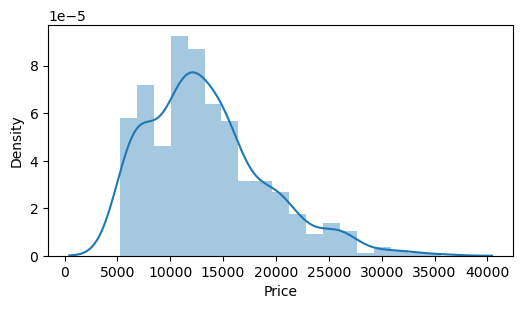

In [60]:
plt.figure(figsize=(6,3))
sns.distplot(data.Price)
plt.show()

- Distribution is skewed and tails of from 15000 mark.

In [59]:
data.Price.skew()

0.870857456165998

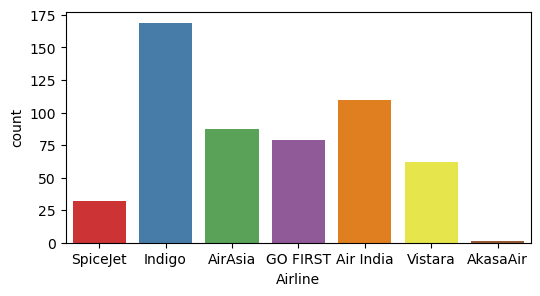

In [61]:
plt.figure(figsize=(6,3),facecolor='white')
sns.countplot(data['Airline'], palette="Set1")
plt.show()

- IndiGo has the highest number of flights followed by Air India and Air Asia.

<AxesSubplot:xlabel='From', ylabel='count'>

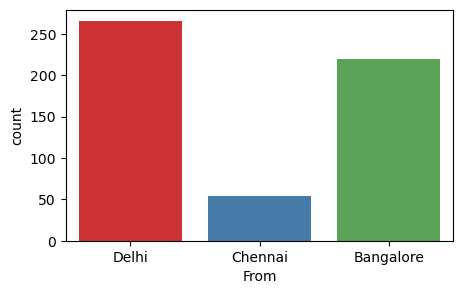

In [63]:
plt.figure(figsize=(5,3),facecolor='white')
sns.countplot(data['From'], palette="Set1")

- Highest number of flights are from Delhi followed by Bangalore.

<AxesSubplot:xlabel='To', ylabel='count'>

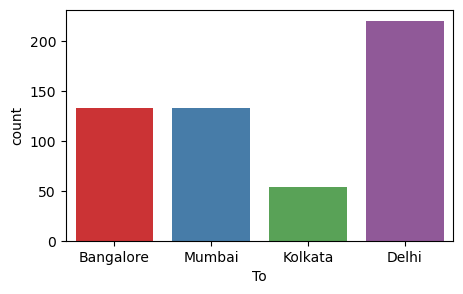

In [65]:
plt.figure(figsize=(5,3),facecolor='white')
sns.countplot(data['To'], palette="Set1")

- Delhi is the most popular destination followed by Mumbai, Bangalore.

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

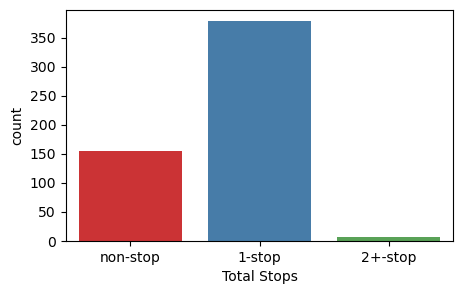

In [67]:
plt.figure(figsize=(5,3),facecolor='white')
sns.countplot(data['Total Stops'], palette="Set1")

- Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop.

Text(0.5, 1.0, 'Price Trend')

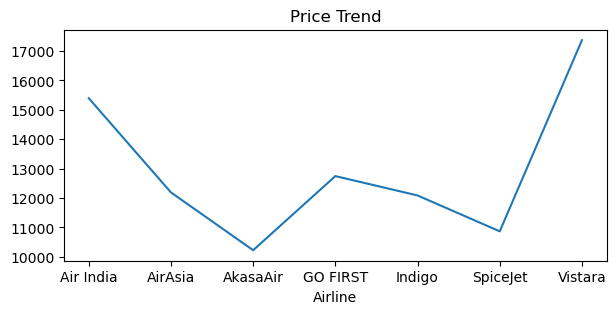

In [73]:
#Airlines vs Price

fig, ax = plt.subplots(figsize=(7,3))
data.groupby(['Airline']).mean()['Price'].plot(ax=ax)
plt.title('Price Trend')



Text(0.5, 1.0, 'Price Trend')

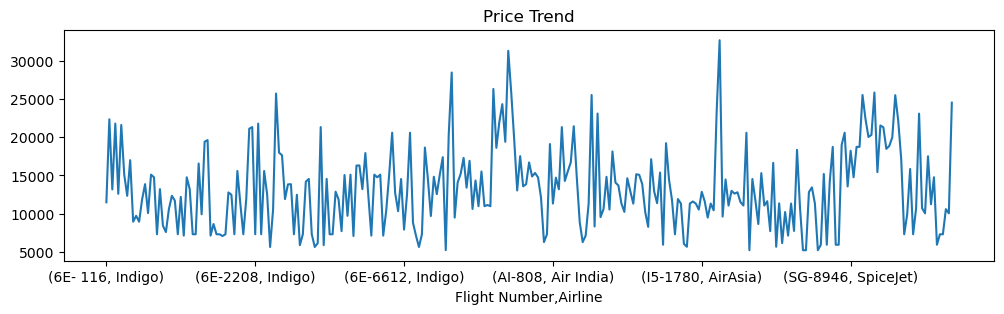

In [76]:
# Flight numbers vs Price

fig, ax = plt.subplots(figsize=(12,3))
data.groupby(['Flight Number','Airline'])['Price'].mean().plot(ax=ax)
plt.title('Price Trend')



IndiGo and SpiceJet offer air tickets at the most affordable prices on average, whereas Air Asia, Air India are the most expensive on average.

Text(0.5, 1.0, 'Price Trend')

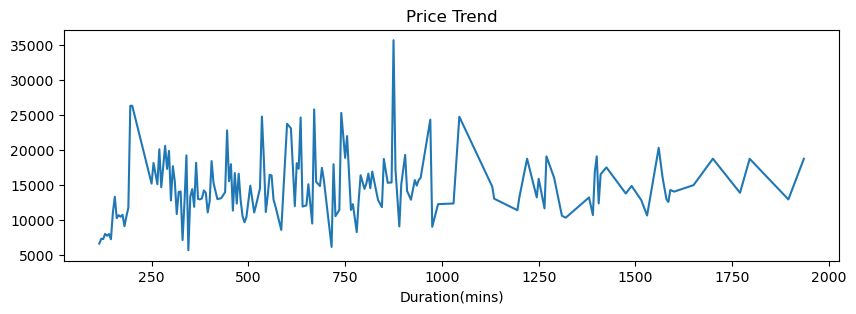

In [78]:
plt.figure(figsize=(10,3))
data.groupby('Duration(mins)')['Price'].mean().plot()
plt.title('Price Trend')

 - we can see, mostly duration of flight is maximum lies in between 250 to 750 and they have 15000 to 25000 price of ticket.

Text(0.5, 1.0, 'Duration vs Stops')

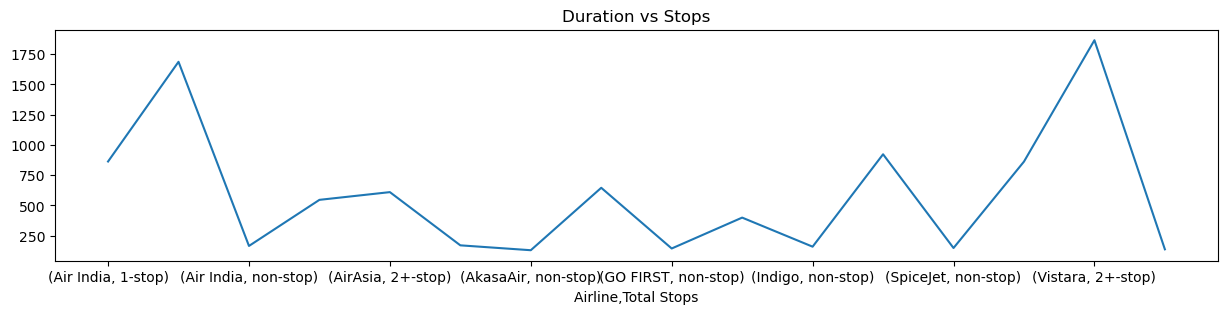

In [81]:
plt.figure(figsize=(15,3))
data.groupby(['Airline','Total Stops'])['Duration(mins)'].mean().plot()
plt.title('Duration vs Stops')

- It can be observed that Number of Stops impact the travel time of Airlines.

Text(0.5, 1.0, 'Price vs Stops')

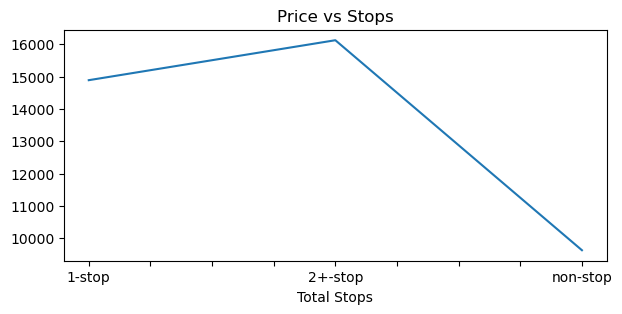

In [83]:
plt.figure(figsize=(7,3))
data.groupby(['Total Stops'])['Price'].mean().plot()
plt.title('Price vs Stops')

- It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines.

<Figure size 100x100 with 0 Axes>

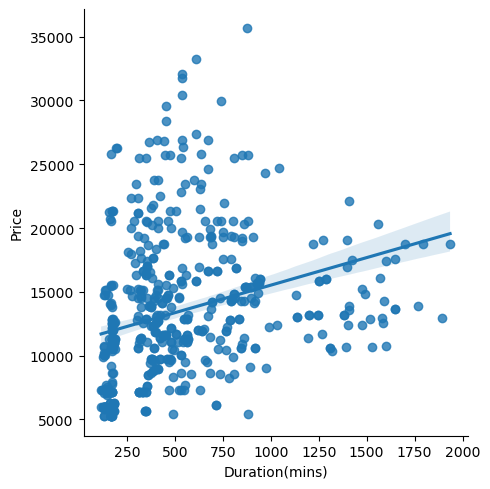

In [89]:
plt.figure(figsize=(1,1),facecolor='white')
sns.lmplot(x="Duration(mins)", y="Price", data=data)

- There is a linear relationship between Price and flight duration.

<AxesSubplot:xlabel='To', ylabel='Price'>

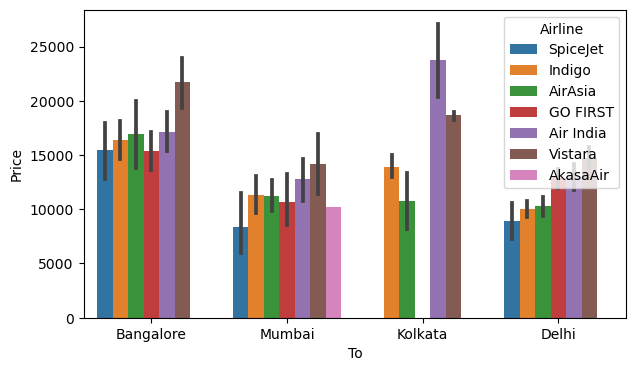

In [91]:
plt.figure(figsize=(7,4),facecolor='white')
sns.barplot(data['To'],data['Price'],hue=data['Airline'])

- Bangalore,Kolakata are the most expensive destinations while Mumbai and Delhi are the most affordable destination.
- SpiceJet and Indigo provide most affordable Airtickets to the destinations.

### Checking for Outliers in continuous data type Features.

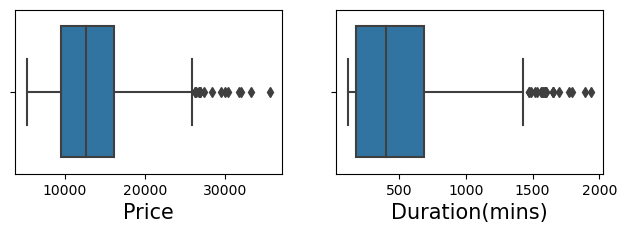

In [92]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in data[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

- There are outliers in all of the above columns.

### Removing Outliers using Z score Method

In [93]:
df2 =data[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [94]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [95]:
df3.shape

(532, 1)

In [96]:
df2.shape

(540, 1)

#### Data loss %:

In [98]:
loss=(540-532)/540 * 100
loss

1.4814814814814816

- 1.48% Data loss is within acceptable range.

#### Using Z score method to reduce outliers since it has a low data loss %

In [99]:
dropindx = data.index.difference(df3.index)

In [100]:
dropindx

Int64Index([34, 40, 72, 73, 303, 310, 403, 513], dtype='int64')

In [101]:
data.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [102]:
data.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [103]:
data

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Duration(mins)
0,SpiceJet,SG- 191,Jan 06,Delhi,Bangalore,non-stop,7754,170
1,Indigo,6E-6612,Jan 06,Delhi,Bangalore,non-stop,7929,170
2,Indigo,6E-2067,Jan 06,Delhi,Bangalore,non-stop,8654,175
3,AirAsia,I5-779,Jan 06,Delhi,Bangalore,1-stop,8654,685
4,GO FIRST,G8- 113,Jan 06,Delhi,Bangalore,non-stop,8654,170
...,...,...,...,...,...,...,...,...
527,Air India,AI-640,Jan 06,Bangalore,Delhi,1-stop,16641,335
528,Air India,AI-640,Jan 06,Bangalore,Delhi,1-stop,16903,820
529,Indigo,6E- 408,Jan 06,Bangalore,Delhi,1-stop,16997,355
530,Indigo,6E- 528,Jan 06,Bangalore,Delhi,1-stop,17686,385


<AxesSubplot:xlabel='Duration(mins)'>

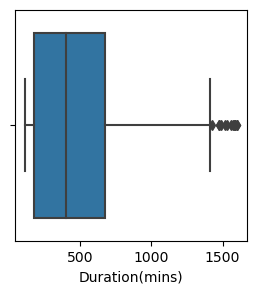

In [105]:
plt.figure(figsize=(3,3),facecolor='white')
sns.boxplot(data['Duration(mins)'])

- A lot of outliers have been removed.

### Checking for skewness in data distributions

In [106]:
data['Duration(mins)'].skew()

1.2528380785863484

### Normalizing Data Distribution using PowerTransformer

In [108]:
from sklearn.preprocessing import PowerTransformer

In [109]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [110]:
df4 = data[['Duration(mins)']]

In [111]:
transformed= powtrans.fit_transform(df4)

In [112]:
type(transformed)

numpy.ndarray

In [113]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [114]:
transformed.skew()

Duration(mins)    0.001021
dtype: float64

In [115]:
transformed.index = data.index

In [116]:
data[['Duration(mins)']] = transformed[['Duration(mins)']]

In [117]:
data['Duration(mins)'].skew()

0.0010211355582539292

- A lot of skewness has been removed.

### Encoding Categorical Columns
### Encoding using get_dummies()

In [118]:
data

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Duration(mins)
0,SpiceJet,SG- 191,Jan 06,Delhi,Bangalore,non-stop,7754,-1.175567
1,Indigo,6E-6612,Jan 06,Delhi,Bangalore,non-stop,7929,-1.175567
2,Indigo,6E-2067,Jan 06,Delhi,Bangalore,non-stop,8654,-1.134215
3,AirAsia,I5-779,Jan 06,Delhi,Bangalore,1-stop,8654,0.811724
4,GO FIRST,G8- 113,Jan 06,Delhi,Bangalore,non-stop,8654,-1.175567
...,...,...,...,...,...,...,...,...
527,Air India,AI-640,Jan 06,Bangalore,Delhi,1-stop,16641,-0.207813
528,Air India,AI-640,Jan 06,Bangalore,Delhi,1-stop,16903,1.067824
529,Indigo,6E- 408,Jan 06,Bangalore,Delhi,1-stop,16997,-0.125105
530,Indigo,6E- 528,Jan 06,Bangalore,Delhi,1-stop,17686,-0.009407


In [120]:
dumm = pd.get_dummies(data[['Airline','Total Stops','Date of Departure']],drop_first = False)

In [121]:
data = data.join(dumm)

In [122]:
#Dropping the columns since they are no longer needed
data.drop(columns = ['Airline','Flight Number','Total Stops','Date of Departure'],inplace=True) 

In [123]:
data

,From,To,Price,Duration(mins),Airline_Air India,Airline_AirAsia,Airline_AkasaAir,Airline_GO FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Total Stops_1-stop,Total Stops_2+-stop,Total Stops_non-stop,Date of Departure_Jan 06,Date of Departure_Jan 10
0,Delhi,Bangalore,7754,-1.175567,0,0,0,0,0,1,0,0,0,1,1,0
1,Delhi,Bangalore,7929,-1.175567,0,0,0,0,1,0,0,0,0,1,1,0
2,Delhi,Bangalore,8654,-1.134215,0,0,0,0,1,0,0,0,0,1,1,0
3,Delhi,Bangalore,8654,0.811724,0,1,0,0,0,0,0,1,0,0,1,0
4,Delhi,Bangalore,8654,-1.175567,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Bangalore,Delhi,16641,-0.207813,1,0,0,0,0,0,0,1,0,0,1,0
528,Bangalore,Delhi,16903,1.067824,1,0,0,0,0,0,0,1,0,0,1,0
529,Bangalore,Delhi,16997,-0.125105,0,0,0,0,1,0,0,1,0,0,1,0
530,Bangalore,Delhi,17686,-0.009407,0,0,0,0,1,0,0,1,0,0,1,0


### Encoding Columns 'From' and 'To' using Label Encoder

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
labenc = LabelEncoder()

In [126]:
for col in data[['From','To']]:
    data[col] = labenc.fit_transform(data[col])

In [127]:
data

,From,To,Price,Duration(mins),Airline_Air India,Airline_AirAsia,Airline_AkasaAir,Airline_GO FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Total Stops_1-stop,Total Stops_2+-stop,Total Stops_non-stop,Date of Departure_Jan 06,Date of Departure_Jan 10
0,2,0,7754,-1.175567,0,0,0,0,0,1,0,0,0,1,1,0
1,2,0,7929,-1.175567,0,0,0,0,1,0,0,0,0,1,1,0
2,2,0,8654,-1.134215,0,0,0,0,1,0,0,0,0,1,1,0
3,2,0,8654,0.811724,0,1,0,0,0,0,0,1,0,0,1,0
4,2,0,8654,-1.175567,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,1,16641,-0.207813,1,0,0,0,0,0,0,1,0,0,1,0
528,0,1,16903,1.067824,1,0,0,0,0,0,0,1,0,0,1,0
529,0,1,16997,-0.125105,0,0,0,0,1,0,0,1,0,0,1,0
530,0,1,17686,-0.009407,0,0,0,0,1,0,0,1,0,0,1,0


### Finding Correlation

In [128]:
f_corr =data.corr()

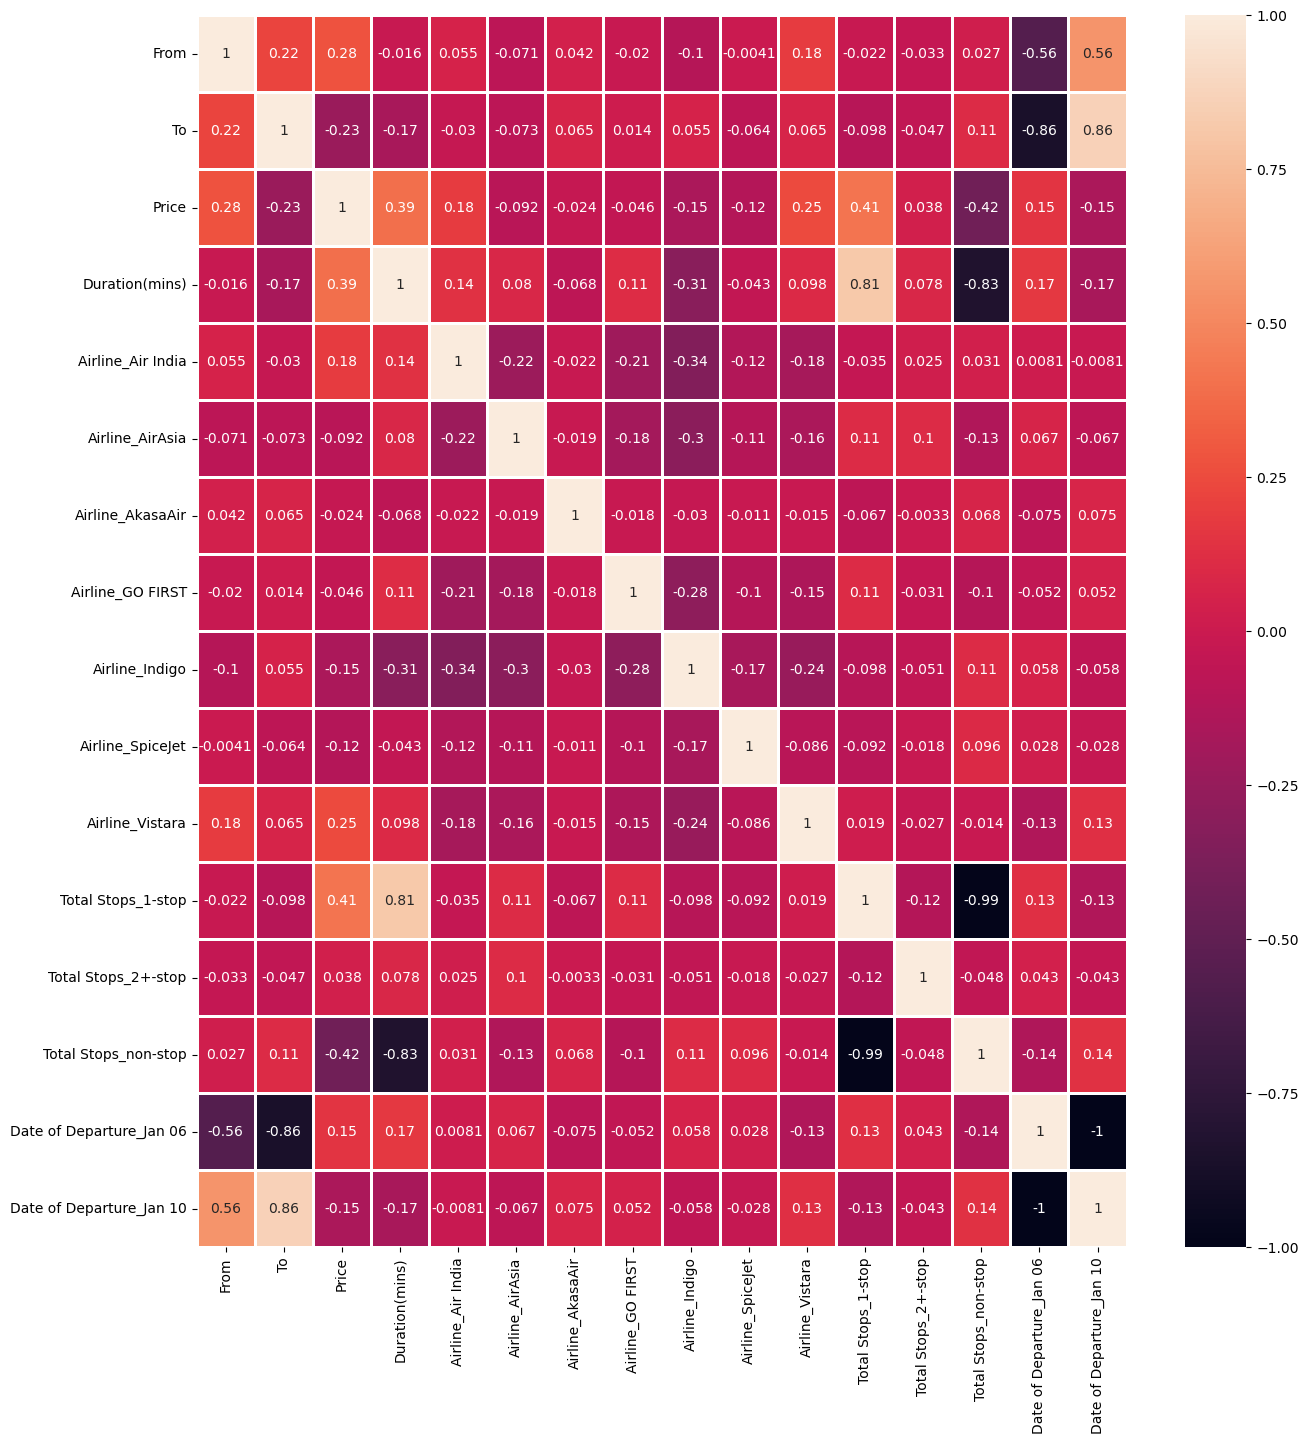

In [129]:
plt.figure(figsize=(15,16))
sns.heatmap(f_corr,annot=True,linewidth=1)
plt.show()


### Visualizing correlation of feature columns with label column.

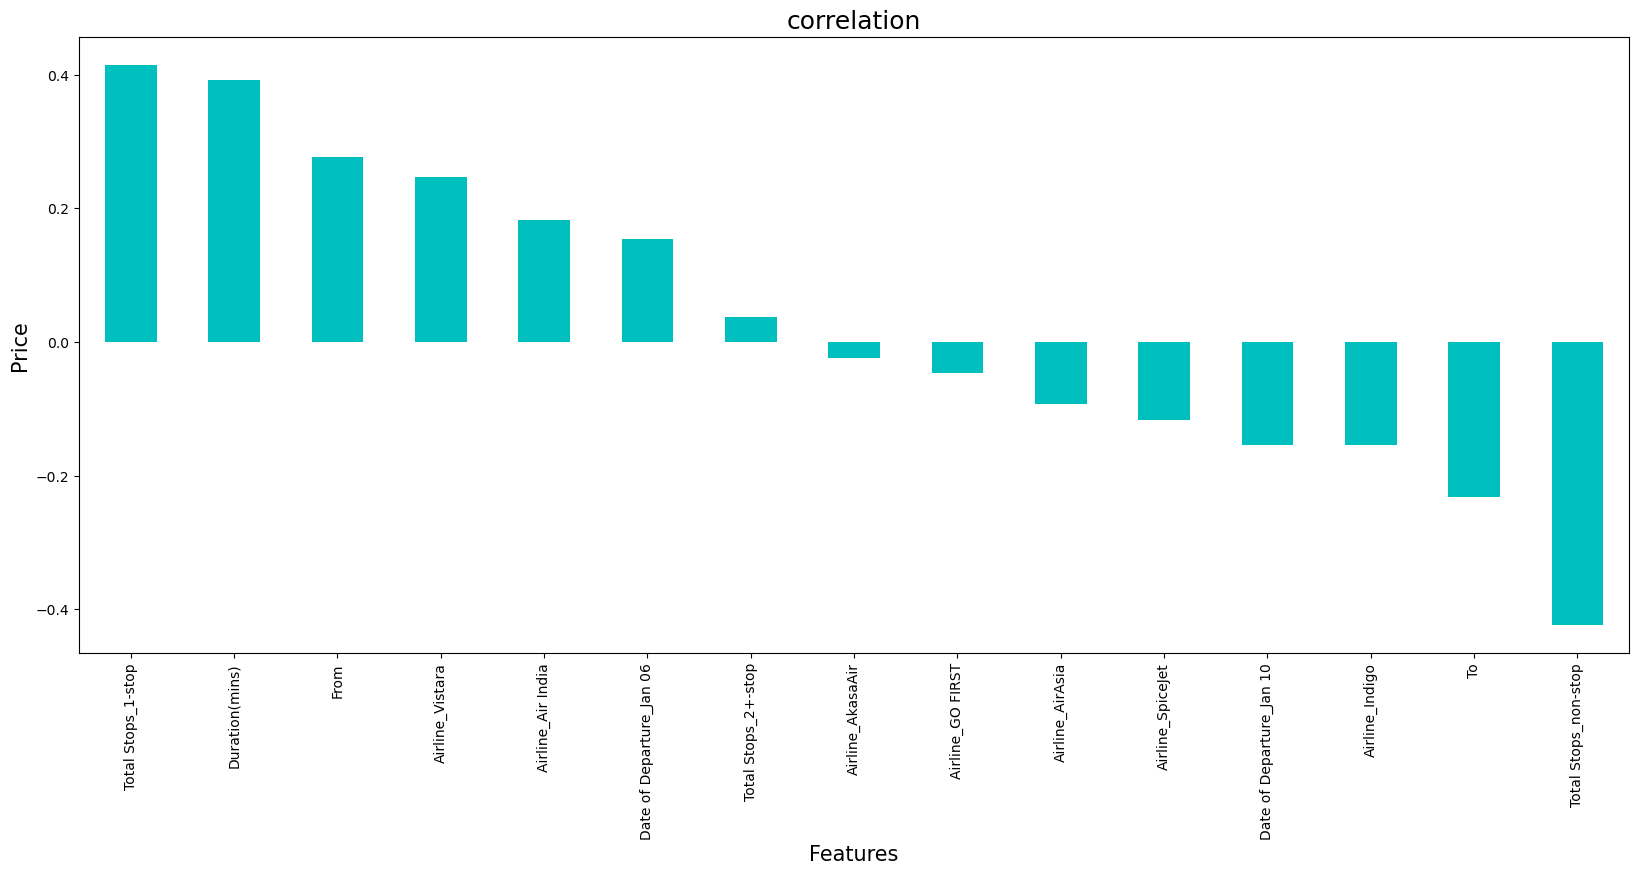

In [130]:
plt.figure(figsize = (20,8))
data.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed thatTotal Stops_1-stop, Duration(min) and From have the highest positive correlation with Price, while Total - - Stops_non-stop,to have the highest negative correlation with Price.

## Feature Selection

In [133]:
from sklearn.preprocessing import StandardScaler

In [131]:
X = data.drop(columns = ['Price'])
y = data['Price']

In [134]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
vif = pd.DataFrame()

In [137]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,From,2.525179
1,To,6.859865
2,Duration(mins),4.197699
3,Airline_Air India,inf
4,Airline_AirAsia,inf
5,Airline_AkasaAir,inf
6,Airline_GO FIRST,inf
7,Airline_Indigo,inf
8,Airline_SpiceJet,inf
9,Airline_Vistara,inf


- MultiCollinearity exists amongst many columns, Based on ANOVA F scores, columns scoring the lowest will be dropped.

### Selecting Kbest Features

In [139]:
from sklearn.feature_selection import SelectKBest, f_classif

In [140]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [141]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(20,'Score'))

                     Feature       Score
0                       From         inf
5           Airline_AkasaAir         inf
13  Date of Departure_Jan 06  167.538462
14  Date of Departure_Jan 10  167.538462
1                         To  120.173639
2             Duration(mins)    5.755641
3          Airline_Air India    4.854889
12      Total Stops_non-stop    4.421311
6           Airline_GO FIRST    4.161405
10        Total Stops_1-stop    4.152872
4            Airline_AirAsia    4.133746
7             Airline_Indigo    3.360991
9            Airline_Vistara    3.111581
8           Airline_SpiceJet    2.375814
11       Total Stops_2+-stop    1.254916


### Selecting best features based on their scores:

In [142]:
x_best = X.drop(columns=['From','Airline_AkasaAir']).copy()

In [143]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Linear Regression
### Finding Best Random State

In [146]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.6416454058175829 on random_state: 68


In [147]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =68)

In [149]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XG Boost Regressor' : XGBRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(x_train,y_train)
    pred = model.predict(x_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [150]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,3458.211,2.133774e+07,4619.279511,0.436
Random Forest,2663.790,1.392145e+07,3731.145841,0.632
Gradient Boost Regressor,2796.029,1.425407e+07,3775.455826,0.623
XG Boost Regressor,2625.698,1.668401e+07,4084.606968,0.559


## Model Cross Validation

In [151]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

### Linear Regression

In [153]:
cross_val_score(LinearRegression(),scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.3195347086200451

### RandomForestRegressor

In [154]:
cross_val_score(RandomForestRegressor(),scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.3378248410412818

### GradientBoostingRegressor

In [155]:
cross_val_score(GradientBoostingRegressor(),scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.5693758678211911

### XGBRegressor

In [156]:
cross_val_score(XGBRegressor(),scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.3891687568531931

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Gradient Boosting Regressor is the best model. 

## Hyperparameter tuning

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
 
param = {'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,5,6,7], 
            'min_samples_leaf':[3,4,5,6]} 

In [160]:
grd = GridSearchCV(GradientBoostingRegressor(),param_grid=param)

In [161]:
grd.fit(x_train,y_train)

grd.best_params_

{'learning_rate': 0.02,
 'max_depth': 6,
 'min_samples_leaf': 4,
 'n_estimators': 100}

In [172]:
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.02, max_depth=5, min_samples_leaf = 3)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
r2_score(y_test,y_pred)

0.6484852095578364

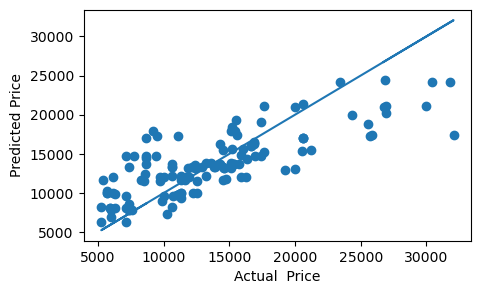

In [175]:
plt.figure(figsize=(5,3))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual  Price')
plt.ylabel('Predicted Price')
plt.show()

## Model Save

In [176]:
import joblib
joblib.dump(gbr,"flight_price_prediction.pkl")

['flight_price_prediction.pkl']

### Loading The Model

In [177]:
mod=joblib.load("flight_price_prediction.pkl")

### Predicting the Selling Price of car

In [178]:
print(mod.predict(scaled_x_best))

[12529.85579124 13346.65456822 14431.05924772 16998.16348854
 13647.10230837 17913.74074633 17358.19160853 17320.22655829
 16795.20364397 16998.16348854 13346.65456822 13370.36529776
 15701.83811366 15232.52055981 15232.52055981 15540.94890147
 17320.22655829 16838.36320392 17354.08885085 13346.65456822
 11734.89530779 12032.08957289 11975.92396268 11975.92396268
 15934.59574478 11734.89530779 11734.89530779 13226.84816367
 12493.68017566 13346.65456822 14431.05924772 14460.8559875
 13153.94037447 15562.22315549 13346.65456822 14809.76660068
 14288.33189626 16238.64474026 13887.10836248 16166.0428215
 15581.31265148 16848.06414849 13346.65456822 15581.31265148
 17066.49482662 16238.64474026 19109.63617715 14288.33189626
 15232.52055981 15534.51610105 16838.36320392 15581.31265148
 15602.58690551 15392.91060004 15602.58690551 15392.91060004
 15632.99618424 14806.08810924 17933.2419251  19272.00330995
 17913.74074633 14809.76660068 17363.78979542 17071.49361739
 15746.99611254 16217.5637

In [179]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,12529.855791,7754
1,13346.654568,7929
2,14431.059248,8654
3,16998.163489,8654
4,13647.102308,8654
5,17913.740746,9210
6,17358.191609,9494
7,17320.226558,9494
8,16795.203644,9494
9,16998.163489,9494
